# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<b>План работы</b>

<b>Шаг 1. Откройте файл с данными и изучите общую информацию</b>

<b> Шаг 2. Подготовьте данные</b>
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.
* Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

<b> Шаг 3. Проведите исследовательский анализ данных</b>
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.
* Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<b> Шаг 4. Составьте портрет пользователя каждого региона</b>
* Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<b> Шаг 5. Проверьте гипотезы</b>
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;

Какой критерий применили для проверки гипотез и почему.

<b> Шаг 6. Напишите общий вывод</b>
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats as st
import math
import seaborn as sns

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Открыли данные. Сразу видно, что датасет требует обработки для дальнейшей работы. Есть пропущенные данные, название столбцов нужно приводить к змеиному регистру. Очевидно, что User_Score нужно привезти к float а год к int. Переходим к следующему шагу, там будем разбираться подробнее.

## Шаг 2. Подготовка данных

### Приведем название колонок к ниженму регистру

In [6]:
data.columns = data.columns.str.lower()

Привели названия столбцов к змеиному стилю.

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработаем дубликаты

In [8]:
 data.duplicated().sum()

0

</font><font color='Blue'><b>Явных дубликатов нет</b></font><br>

In [9]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [11]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

</font><font color='Blue'><b>Нявных дубликатов нет.</b></font><br>

### Поменяем тип данных

In [13]:
data['year_of_release'] = data['year_of_release'].dropna().astype('int64')

In [14]:
# Комментарий ревьюера
temp = data.copy()
temp['user_score'] = temp['user_score'].replace('tbd', np.nan).astype(float)
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [15]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype(float)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Привели данные в нужный формат. С годом пришлось удалить строки с незаполненными значениями, ведь год сложно заменить в нашем случае. Но в датасете всего 2% таких значений - это не повлияет на наше исследование.

В user_score ошибка возникала из-за наличия значения "tbd" (To Be Determined - еще не определено) в столбце 'user_score', которое не может быть преобразовано в тип float. Поменяли такие значения на  NaN (значение, обозначающее отсутствие данных).

### Проверяем пропущенные значения

In [17]:
data.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [18]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])

### Добавим колонку с общими продажами.

In [19]:
data['general_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [20]:
data.sort_values(by = 'year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN,1.15
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN,2.76
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN,1.05
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN,0.27
5360,Freeway,2600,1980.0,Action,0.32,0.02,0.0,0.00,NaN,NaN,NaN,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.0,0.00,NaN,NaN,NaN,0.01


Добавили столбец с общими продажами.

### Выводы шаг 2

Привели данные в нужный формат. С годом пришлось удалить строки с незаполненными значениями, ведь год сложно заменить в нашем случае. Но в датасете всего 2% таких значений - это не повлияет на наше исследование.

В user_score ошибка возникала из-за наличия значения "tbd" (To Be Determined - еще не определено) в столбце 'user_score', которое не может быть преобразовано в тип float. Поменяли такие значения на NaN (значение, обозначающее отсутствие данных).

Пропуски в Name и genre решили оставить, поскольку строки с этими данными занимают большую часть дата-сета, а заменить их нечем. Но мы запомним, что они есть и если что учтем это далее.

Добавили столбец с общими продажами.


In [21]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  general_sales    16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!

## Шаг 3. Проведите исследовательский анализ данных

###  Сколько игр выпускалось в разные годы

Сделаем табличку, посмотрим сколько игр выпускалось в разные годы. Построим график для наглядности.

In [22]:
year_relize = data.pivot_table(index='year_of_release', values='general_sales', aggfunc='count')

In [23]:
year_relize

,general_sales
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


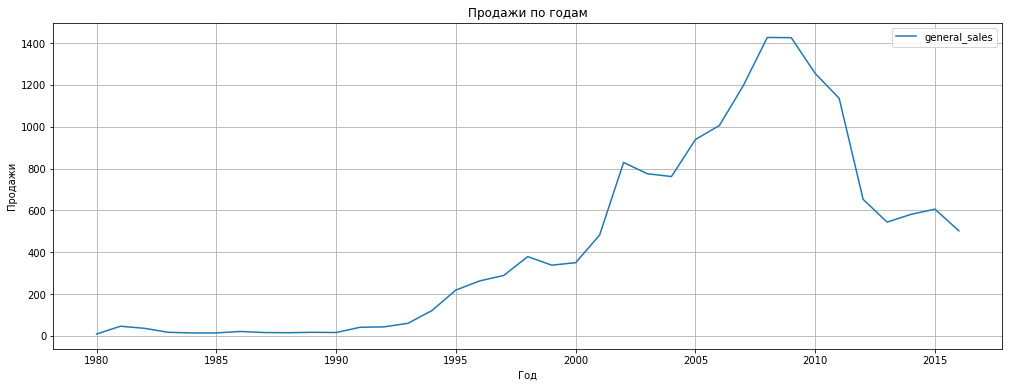

In [24]:
year_relize.plot(grid=True, figsize=(17,6))
plt.title('Продажи по годам')
plt.xlabel('Год')
plt.ylabel('Продажи');

### Как менялись продажи по платформам?

Построим график, посмотрим данные в таблице.

In [25]:
 platform = (data.pivot_table(index='platform', values='general_sales', aggfunc='sum').sort_values('general_sales', ascending=False))
 platform

,general_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


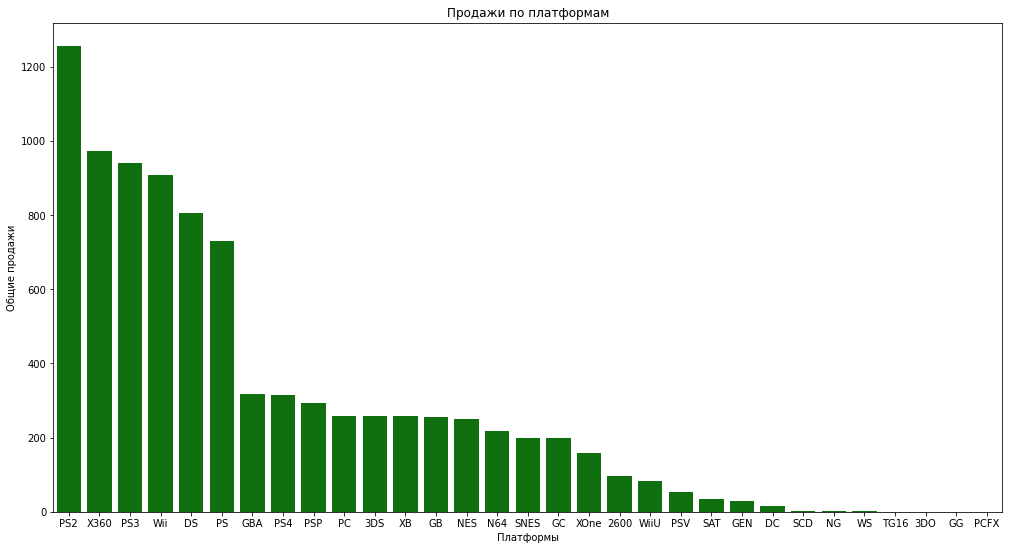

In [26]:
plt.figure(figsize=(17, 9))
(sns.barplot(data = platform, x = platform.index, y = 'general_sales', color = 'green')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

Из графика видно, что есть 6 лидеров продаж. Возьмем эти платформы, посмотрим динамику по каждой из их по годам.

In [27]:
platform

,general_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [28]:
platform_top = platform.iloc[:6]
platform_top

,general_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


In [29]:
table_1= pd.pivot_table(data, index='year_of_release', values='general_sales', columns='platform', aggfunc=len, fill_value=0)
table_1

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981.0,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982.0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983.0,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985.0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986.0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987.0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988.0,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### посчитаем средний срок жизни платформы

In [30]:
lt = data.query('platform != "3DS" and platform != "PC" and platform != "PS" and platform != "PS3" and platform != "PS4" and platform \
    != "PSV" and platform != "SAT" and platform != "SNES" and platform != "WiiU" and platform != "X360" and platform != "XOne"')
living_time = lt.groupby('platform')['year_of_release'].max() - lt.groupby('platform')['year_of_release'].min()
living_time.mean()

7.05

In [31]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Получеается, что средний срок жизни платформы 7 с небольшим лет.

### Сделаем графики продаж по ведущим платформам

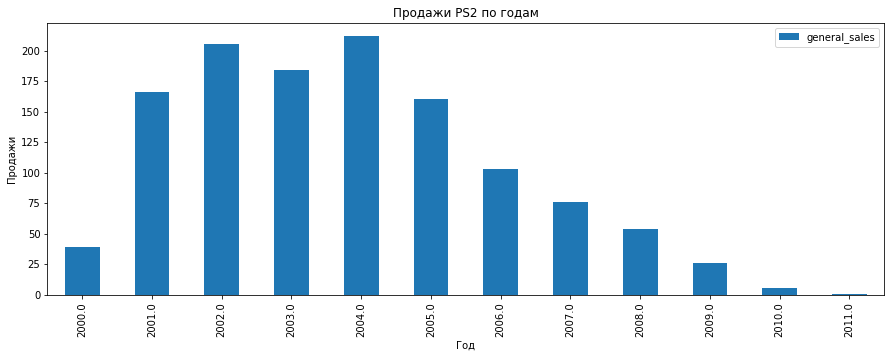

In [33]:
data[data['platform'] == 'PS2'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').\
    plot(kind='bar', figsize=(15,5), title='Продажи PS2 по годам', xlabel='Год', ylabel='Продажи');

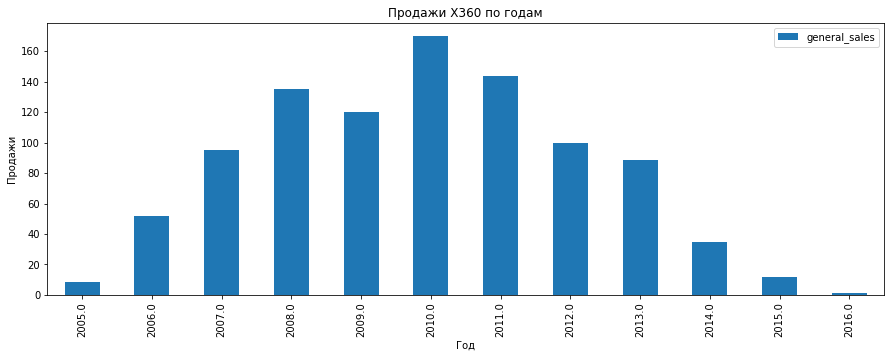

In [34]:
data[data['platform'] == 'X360'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').\
    plot(kind='bar', figsize=(15,5), title='Продажи X360 по годам', xlabel='Год', ylabel='Продажи');

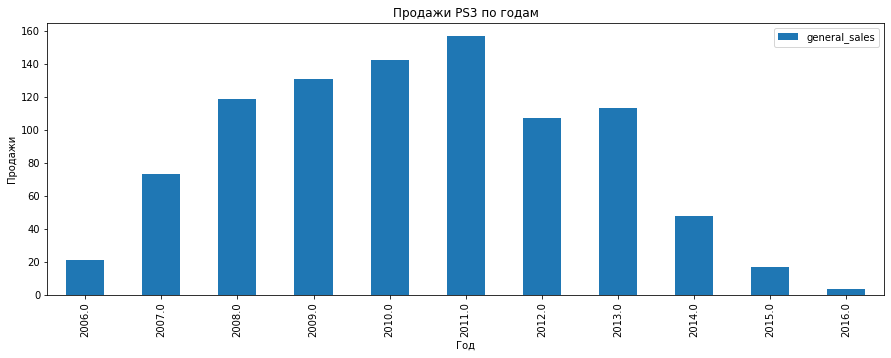

In [35]:
data[data['platform'] == 'PS3'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').\
    plot(kind='bar', figsize=(15,5), title='Продажи PS3 по годам', xlabel='Год', ylabel='Продажи');

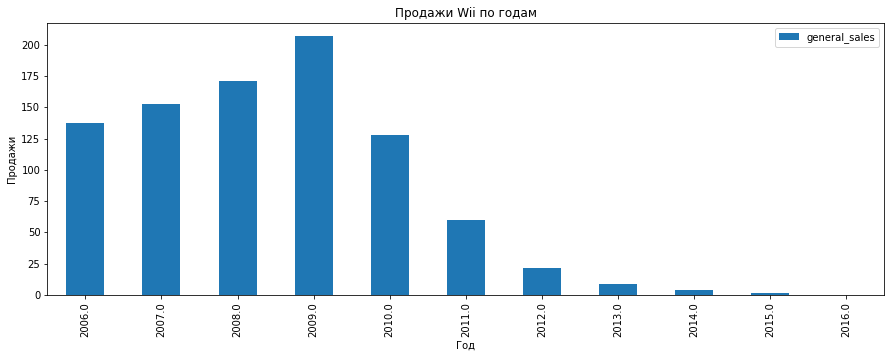

In [36]:
data[data['platform'] == 'Wii'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').\
    plot(kind='bar', figsize=(15,5), title='Продажи Wii по годам', xlabel='Год', ylabel='Продажи');

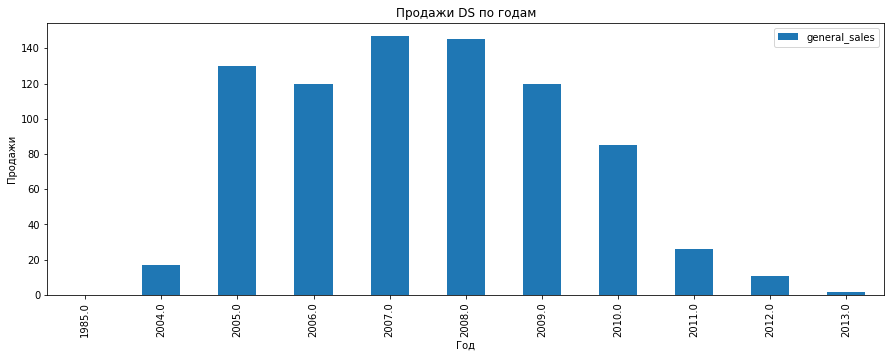

In [37]:
data[data['platform'] == 'DS'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').\
    plot(kind='bar', figsize=(15,5), title='Продажи DS по годам', xlabel='Год', ylabel='Продажи');

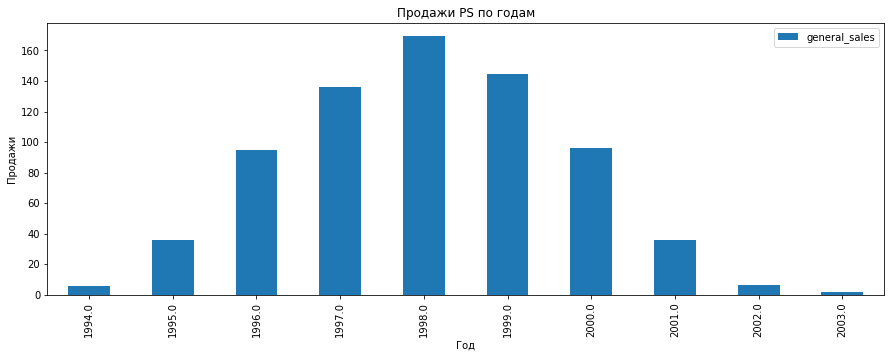

In [38]:
data[data['platform'] == 'PS'].pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').\
    plot(kind='bar', figsize=(15,5), title='Продажи PS по годам', xlabel='Год', ylabel='Продажи');

Интересно, что по всему дата фрейму у нас получается средний срок жизни платформы 7,5 лет. Выбрали  платформы с наибольшими суммарными продажами и построили распределение по годам. Построили графики по 6 топ платформам тут видно, что активная "жизнь" платформы 5-7 лет(не считаем время подъема и спада), далее начинают сокращатся.

Вообще у нас данные с 1980 года. Это только начало. Рынок же сформиловался намногоо позже, поэтому целесообразно будет удалить чать данных за предыдущие периоды, поскольку рынка который мы изучаем и, соответственно закономерностей, которые мы хотим найти для прогноза тогда просто небыло. Возьмем данные за последние 10 лет.

Посмотрел на графики, мне кажеться, что нужно взять период за последние три года. Видно, что ситуация уже совсем другая, а в таком массиве последние три года теряются.

### Анализа данные за последние за актуальный период.
Возьмем для анализа данные за последние 3 года. Проанализируем топов, составим график продаж. 

In [46]:
data_after_2014 = data.query('year_of_release >= 2014')
data_after_2014.info()
data_after_2014.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  general_sales    1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [47]:
 platform_actual2 = (data_after_2014.pivot_table(index='platform', values='general_sales', aggfunc='sum').sort_values('general_sales', ascending=False))
 platform_actual2

,general_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


### Сделаем графики продаж и диаграму Ящик с усами по платформам за актуальные период.

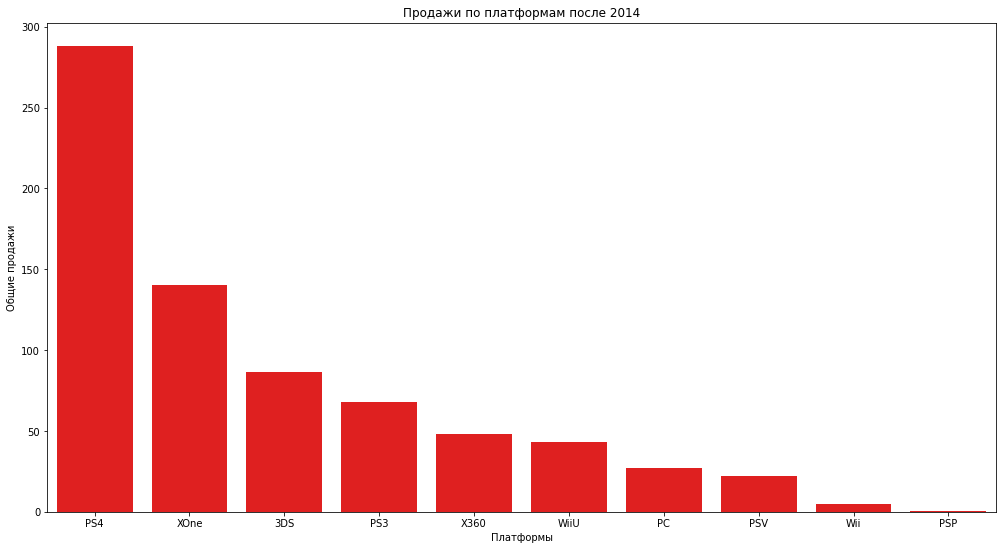

In [48]:
plt.figure(figsize=(17, 9))
(sns.barplot(data = platform_actual2, x = platform_actual2.index, y = 'general_sales', color = 'red')
    .set(title = 'Продажи по платформам после 2014', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

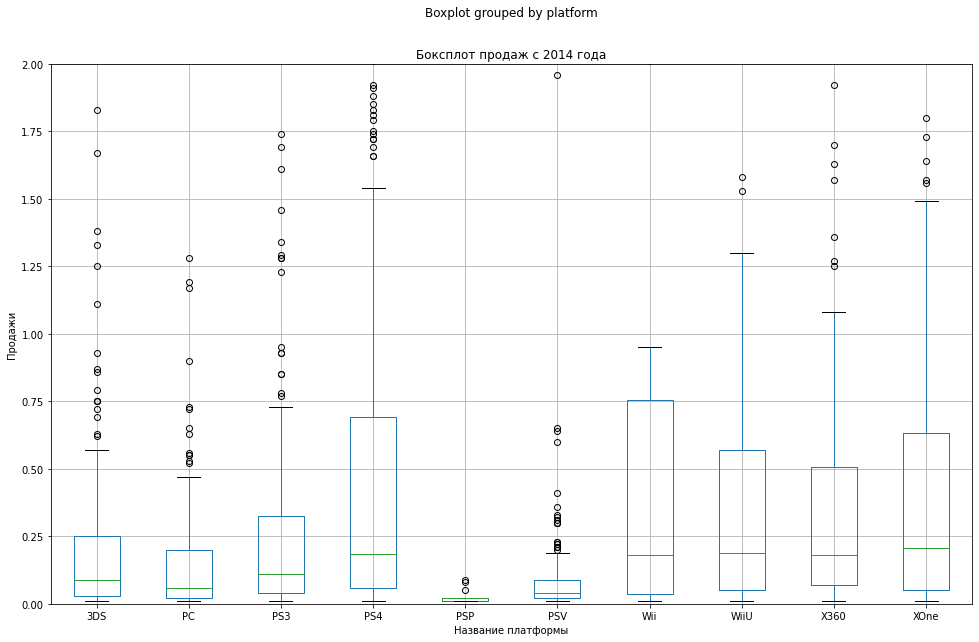

In [50]:
data_after_2014.boxplot(column = ['general_sales'],by = ['platform'],figsize=(16, 10))
plt.ylim([0, 2])
plt.title('Боксплот продаж с 2014 года')
plt.xlabel('Название платформы')
plt.ylabel('Продажи');
plt.show()

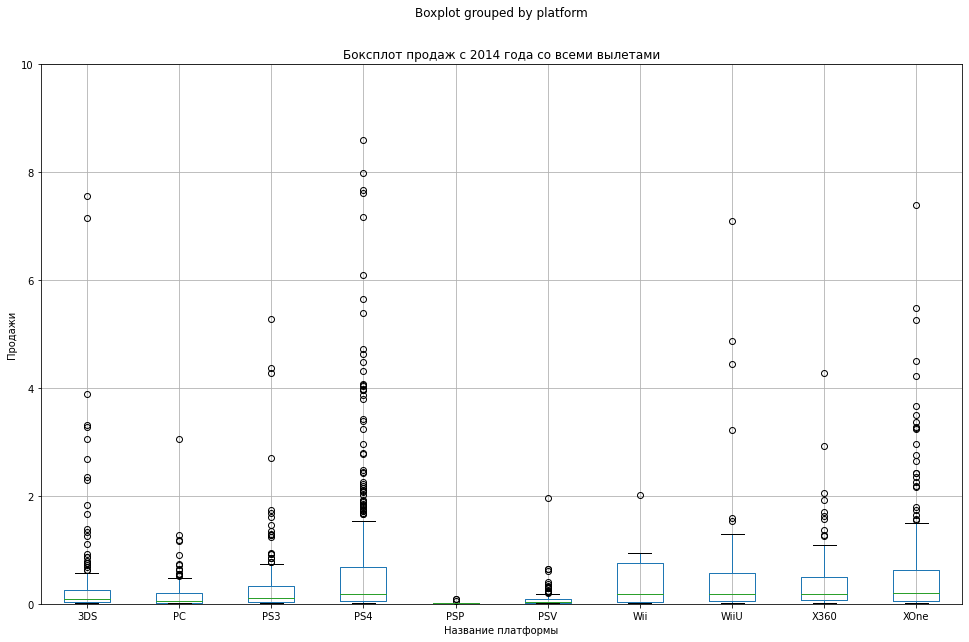

In [51]:
data_after_2014.boxplot(column = ['general_sales'],by = ['platform'],figsize=(16, 10))
plt.ylim([0, 10])
plt.title('Боксплот продаж с 2014 года со всеми вылетами')
plt.xlabel('Название платформы')
plt.ylabel('Продажи');
plt.show()

Итак, что мы видим? Мы видим консолидацию рынка на PlayStation 4. Посмотрим динамику.

In [52]:
table_3= pd.pivot_table(data_after_2014, index='year_of_release', values='general_sales', columns='platform', aggfunc=len, fill_value=0)
table_3.head()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,80,47,108,75,10,100,6,31,63,61
2015.0,86,50,73,137,3,110,4,28,35,80
2016.0,46,54,38,164,0,85,1,14,13,87


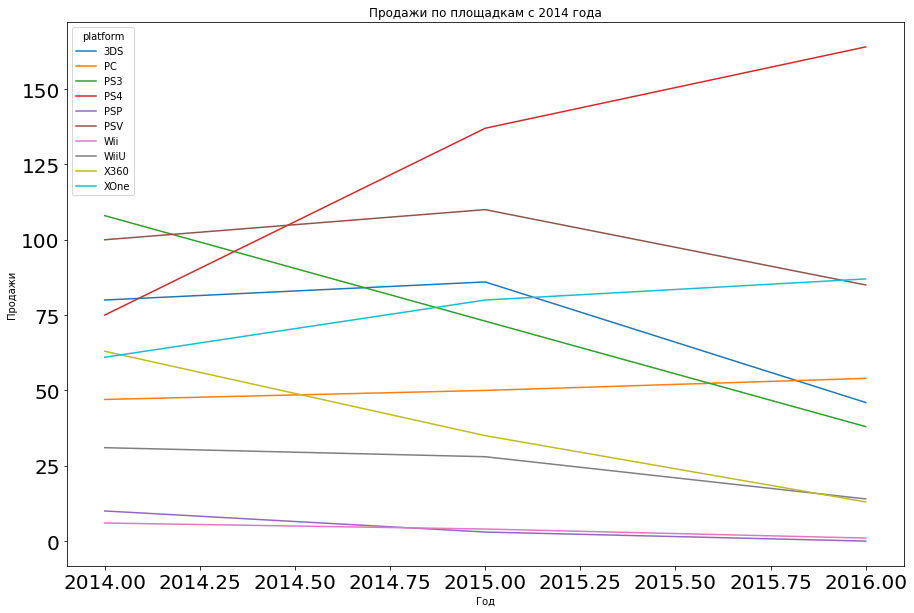

In [53]:
table_3.plot(figsize=(15,10), fontsize=20)
plt.title('Продажи по площадкам с 2014 года')
plt.xlabel('Год')
plt.ylabel('Продажи');

Итак, мы видим, что рынок очень консолидорован на трех игроках, которые продолжаю расти и забирать долю у оставшихся. Это говорит о том, что рынок "зрелый" и скорее всего не стоит ждать новых сильных игроков.

### Влияние на продажи отзывов пользователей и критиков 


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [54]:
#ps_4 = data_after_2014.query('platform == "PS4"')
#ps_4.plot(x='user_score', y='general_sales', kind='scatter')
#plt.title('Ps_4 отзывы пользователей и продажи')
#plt.xlabel('Отзывы пользователей')
#plt.ylabel('Продажи')
#ps_4['user_score'].corr(ps_4['general_sales'])

In [55]:
#ps_4.plot(x='critic_score', y='general_sales', kind='scatter')
#plt.title('Ps_4 оценка критиков и продажи')
#plt.xlabel('Оценка критиков')
#plt.ylabel('Продажи')
#ps_4['critic_score'].corr(ps_4['general_sales'])

<strike>Посчитали коэфициент корреляции Пирсона, как не странно, можно сделать вывод, что продажи почти не зависят от оценки пользователей и только незначительно от оценок критиков в случае с PS4 это так. Проверим ближайшего конкурента.</strike>

Проверим как продажи зависят от оценки критиков. Построим диаграму  для лидеров за актуальный период, посчитаем коэфициент корреляции Пирсона.

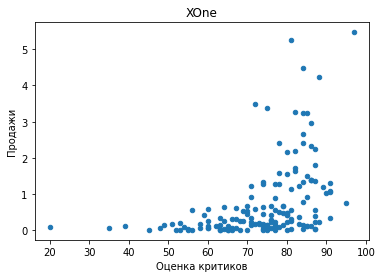

XOne корреляция: 0.42867694370333226


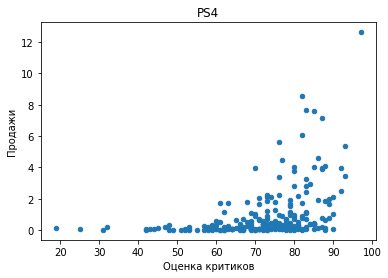

PS4 корреляция: 0.40266141068104083


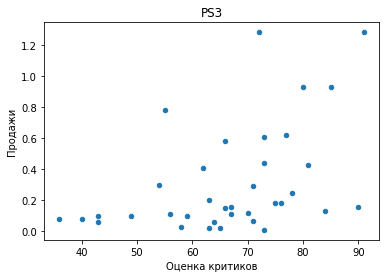

PS3 корреляция: 0.44657460493190704


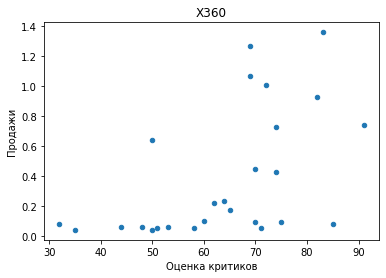

X360 корреляция: 0.5257228356581523


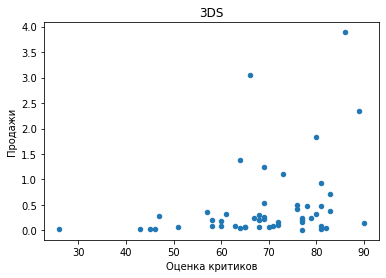

3DS корреляция: 0.314117492869051


In [58]:
platforms = ['XOne', 'PS4', 'PS3', 'X360', '3DS']
for platform in platforms:
    platform_data = data_after_2014[data_after_2014['platform'] == platform]
    platform_data.plot(x='critic_score', y='general_sales', kind='scatter')
    plt.title(platform)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.show()
    correlation = platform_data['critic_score'].corr(platform_data['general_sales'])
    print(platform, 'корреляция:', correlation)

Проверим как продажи зависят от оценки пользоватлей. Построим диаграму для лидеров за актуальный период, посчитаем коэфициент корреляции Пирсона.

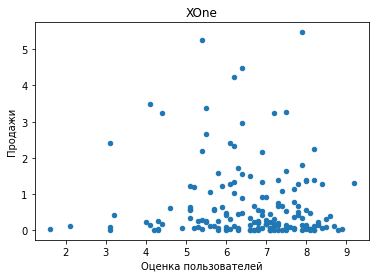

XOne корреляция: -0.0703839280647581


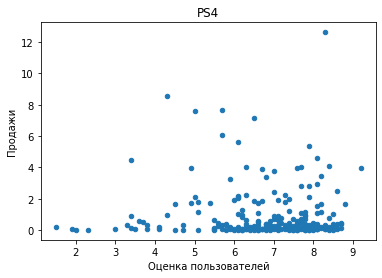

PS4 корреляция: -0.040131589472697356


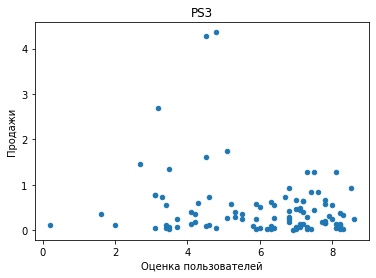

PS3 корреляция: -0.16676141347662118


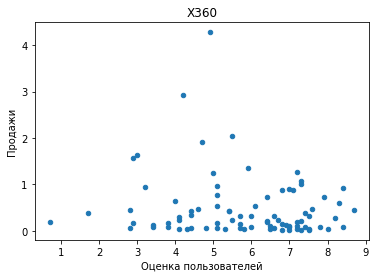

X360 корреляция: -0.138444570945665


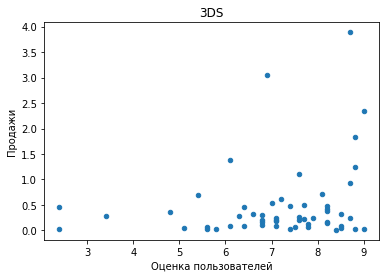

3DS корреляция: 0.2151932718527028


In [59]:
platforms = ['XOne', 'PS4', 'PS3', 'X360', '3DS']
for platform in platforms:
    platform_data = data_after_2014[data_after_2014['platform'] == platform]
    platform_data.plot(x='user_score', y='general_sales', kind='scatter')
    plt.title(platform)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.show()
    correlation = platform_data['user_score'].corr(platform_data['general_sales'])
    print(platform, 'корреляция:', correlation)

На основании графиков кофициентов Пирсона по Топ плащадкам за актуальный период, можно сделат вывод, что продажи не зависят от оценок пользователей и незначительно зависят от оценок критиков.

### Общее распределение игр по жанрам

Посмотрим общее распределение игр по жанрам за актуальные период. Составим таблицы в разрезе суммы продаж и в разрезе медианы. Построи диаграмы.

In [60]:
genre_raitng = (data_after_2014.pivot_table(index='genre', values='general_sales', aggfunc='sum').sort_values('general_sales', ascending=False))
genre_raitng

,general_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Text(0, 0.5, 'Продажи')

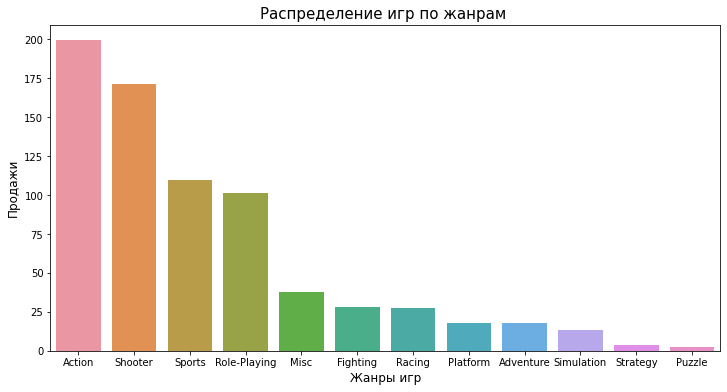

In [61]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data = genre_raitng, x=genre_raitng.index, y='general_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Экшены и стрелялки в лидерах. Стратегии и Пазлы в конце нашего списка.

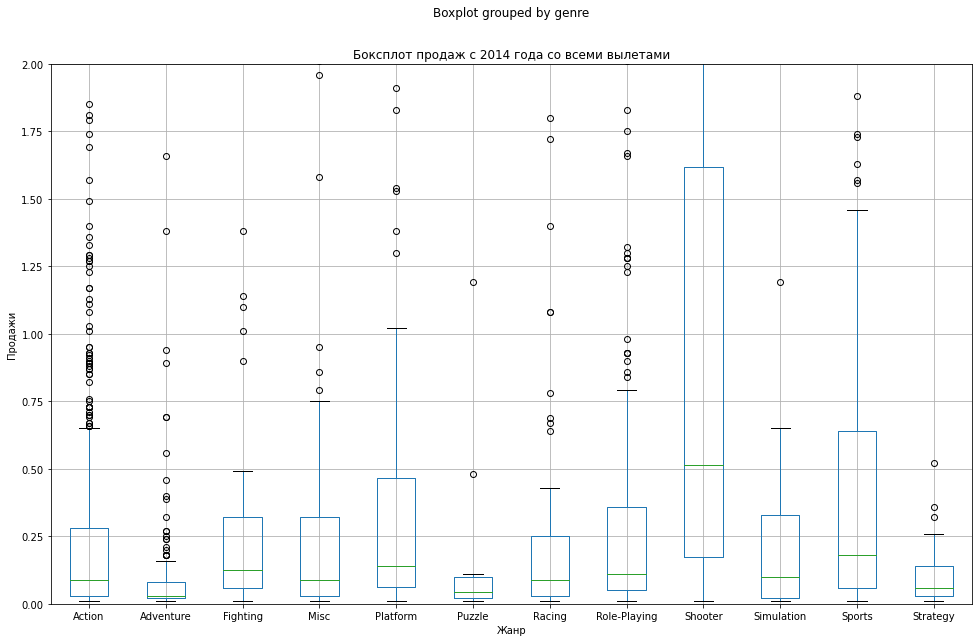

In [62]:
data_after_2014.boxplot(column = ['general_sales'],by = ['genre'],figsize=(16, 10))
plt.ylim([0, 2])
plt.title('Боксплот продаж с 2014 года со всеми вылетами')
plt.xlabel('Жанр')
plt.ylabel('Продажи');
plt.show()

In [63]:
data_after_2014.groupby('genre')['general_sales'].agg(['count','median']).sort_values(by='median', ascending=False)

,count,median
genre,,
Shooter,128,0.515
Sports,161,0.180
Platform,38,0.140
Fighting,60,0.125
Role-Playing,221,0.110
Simulation,44,0.100
Action,619,0.090
Misc,113,0.090
Racing,69,0.090


### Выводы шаг 3:

Смотрели продажи по годам. Выяснили, что рынок с годами менялся, продажи постепенно консолидировались на нескольких попурных площадках. <strike>В это связи пришлось смотреть данные в трех разных временных разрезах. Общий за все время, за послдении 10 лет и за последнии три года. Заметили, что за последние три года есть три четких лидера, позиции которых только укрепляются на рынке.</strike>
Выяснили, что площадки живут в среднем 7 лет. Для дальнейшего анализа взяли период за последние три года.

Проверили корелируют ли продажи с оценками пользователей. Удивительно, но нет.

Проверили, корелируют ли продажи с оценками критиков.. Корелируют но очень слабо.

Посмотрели на популярность игр по жанрам за последние три года.  Постролили диаграму размаха в разрезе поплуярности площадок и жанров игр. Экшены и стрелялки в лидерах. Стратегии и Пазлы в конце нашего списка. Посчитали медианные продажи, можно с уверенностю сказать, что Шутеры - самые популярные игры.

## Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Топ 5 платформ по регионам.

Выделим Топ 5 платформ по регионам, построим диаграмы

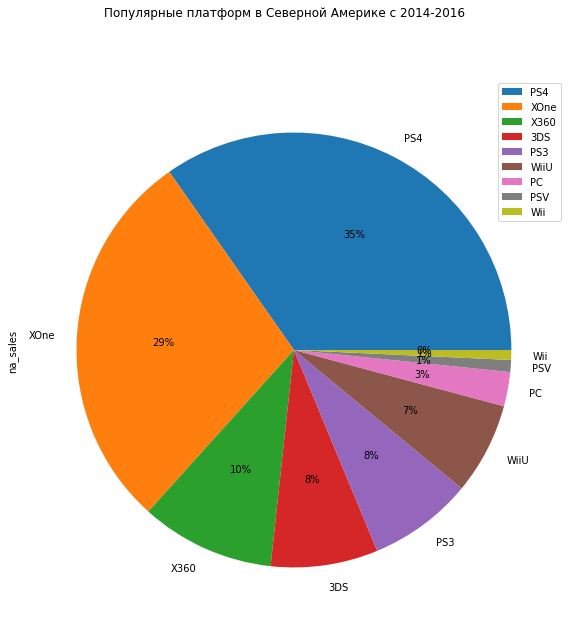

In [64]:
data_after_2014.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').\
    sort_values(ascending=False, by = 'na_sales').plot(kind = 'pie', figsize=(10,10),subplots=True,  autopct = '%1.0f%%',\
    title = 'Популярные платформ в Северной Америке с 2014-2016');

In [65]:
top_platfom_na = (data_after_2014.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False))
top_platfom_na = top_platfom_na[:5]
top_platfom_na

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


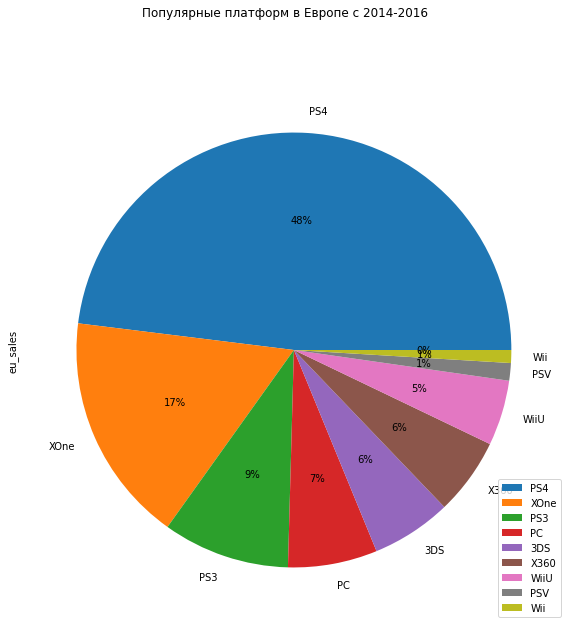

In [66]:
data_after_2014.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').\
    sort_values(ascending=False, by = 'eu_sales').plot(kind = 'pie', figsize=(10,10),subplots=True,  autopct = '%1.0f%%',\
    title = 'Популярные платформ в Европе с 2014-2016');

In [67]:
top_platfom_eu = (data_after_2014.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False))
top_platfom_eu = top_platfom_eu[:5]
top_platfom_eu

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


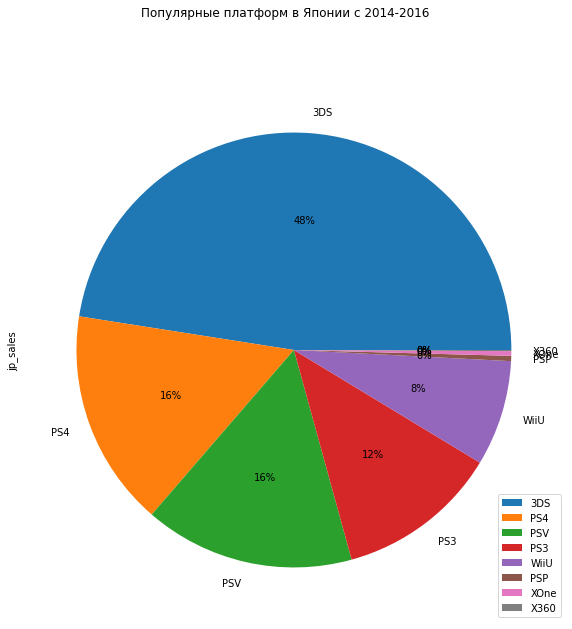

In [68]:
data_after_2014.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').\
    sort_values(ascending=False, by = 'jp_sales').plot(kind = 'pie', figsize=(10,10),subplots=True,  autopct = '%1.0f%%',\
    title = 'Популярные платформ в Японии с 2014-2016');

In [69]:
top_platfom_jp = (data_after_2014.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False))
top_platfom_jp = top_platfom_jp[:5]
top_platfom_jp

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Итак к Америке лидирует PS4- 35% В Европе 48% PS4, в Японии 48% 3DS. Интересно, что в Японии в лидерах портативные приставки.

### Топ 5 жанров в каждом регионе

Выделим топ 5 жанров в каждом регионе, построи диаграмы.

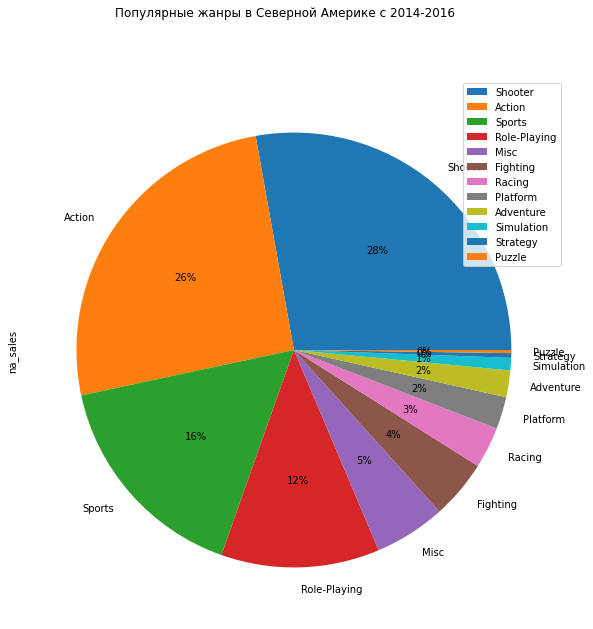

In [70]:
data_after_2014.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').\
    sort_values(ascending=False, by = 'na_sales').plot(kind = 'pie', figsize=(10,10),subplots=True,  autopct = '%1.0f%%',\
    title = 'Популярные жанры в Северной Америке с 2014-2016');

In [71]:
top_genre_na = (data_after_2014.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False))
top_genre_na = top_genre_na[:5]
top_genre_na

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


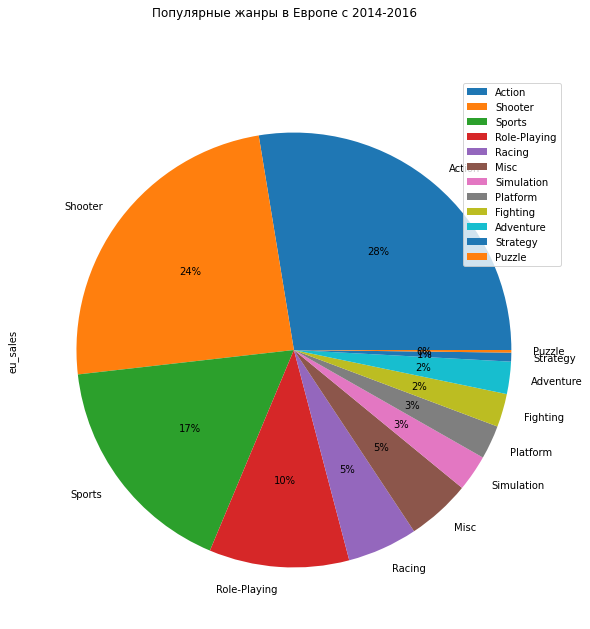

In [72]:
data_after_2014.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').\
    sort_values(ascending=False, by = 'eu_sales').plot(kind = 'pie', figsize=(10,10),subplots=True,  autopct = '%1.0f%%',\
    title = 'Популярные жанры в Европе с 2014-2016');

In [73]:
top_genre_eu = (data_after_2014.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False))
top_genre_eu = top_genre_eu[:5]
top_genre_eu

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


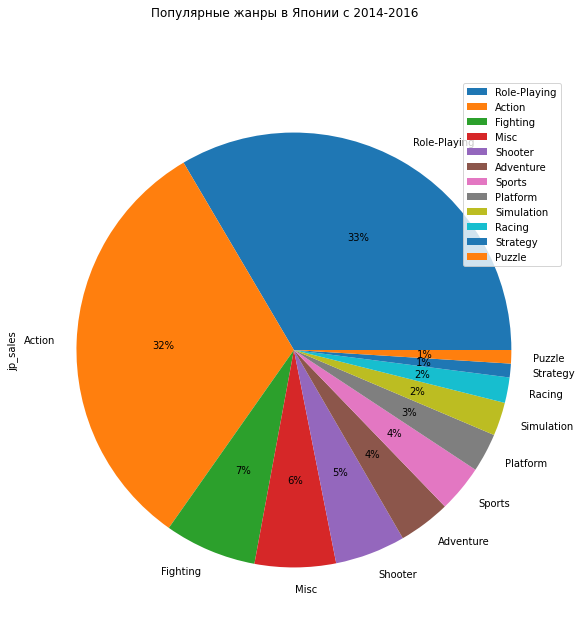

In [74]:
data_after_2014.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').\
    sort_values(ascending=False, by = 'jp_sales').plot(kind = 'pie', figsize=(10,10),subplots=True,  autopct = '%1.0f%%',\
    title = 'Популярные жанры в Японии с 2014-2016');

In [75]:
top_genre_jp = (data_after_2014.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False))
top_genre_jp = top_genre_jp[:5]
top_genre_jp

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


С жанрами Америка и Европ тоже очень похоже. Экшен, стрелялки, спортивные игры, ролевые игры - одинаковое распределение первых четырех мест в этих двух регионах. В Японии же на первом месте Ролевые игры, далее Экшны, Драки и т.д.
Это скорее всего связано в том числе с приставками. На портативных приставках, в эти игры удобно играть.

In [76]:
data_after_2014.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


### Влияние ESRB на продажи в отдельном регионе

In [77]:
region_rating = data_after_2014.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
region_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95


In [78]:
# Комментарий ревьюера
temp = data_after_2014.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

749 0.443457667258733


T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

Опять же картина очень в Европе и Америке очень похожая. Рейтинг "М" наиболее продаваемые игры в Европе и Америке. М - это категория старше 17 лет. Впринципи ничего удивительного, они любят стрелялки и экшны.  В Японии все иначе. Возможно они впринципи этим рейтингом не очень пользуются.

Выводы:
Определили для пользователей каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5).
Для Америки это
1. PS4	98.61
2. XOne	81.27
3. X360	28.30
4. 3DS	22.64
5. PS3	22.05

Для Европы
1. PS4	130.04
2. XOne	46.25
3. PS3	25.54
4. PC	17.97
5. 3DS	16.12

Для Японии:

1. 3DS	44.24
2. PS4	15.02
3. PSV	14.54
4. PS3	11.22
5. WiiU	7.31

В Америке и Европе почти одинково, в вот в Японии все по-другому. Там любят портативные устройства.

Самые популярные жанры (топ-5).
Для Америки это

1. Shooter	79.02
2. Action	72.53
3. Sports	46.13
4. Role-Playing	33.47
5. Misc	15.05

Для Европы это

1. Action	74.68
2. Shooter	65.52
3. Sports	45.73
4. Role-Playing	28.17
5. Racing	14.13

Для Японии это

1. Role-Playing	31.16
2. Action	29.58
3. Fighting	6.37
4. Misc	5.61
5. Shooter	4.87

Опять в японии все подргому. Возможно потому что играть удобнее в другие игры на портативных приставках.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Сделали табличку, посмотрели что продаж опять же в Америке и Европе больше с рейтингом "М" возможно потому что это рейтинг 17+, как мы помним любимые игры в этих регионах шутеры и экшн. Возможно этим рейтингом почти не пользоуются в Японии.

## Шаг 5. Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;

Гипотеза №1
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и анльтернативную гипотезы:

* Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

In [79]:
alpha = .05
xbox_one = data_after_2014[(data_after_2014['platform'] == 'XOne') & (data_after_2014['user_score'] > 0)]['user_score']
pc = data_after_2014[(data_after_2014['platform'] == 'PC') & (data_after_2014['user_score'] > 0)]['user_score']
results = st.ttest_ind(xbox_one, pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


 Статистическо значимой разницы между средним пользователемским рейтингом Xbox One и PC нет

Таким образом, средний пользовательский рейтинг платформ Xbox One и PC одинаковый.

Гипотеза №2
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Таким образом у нас две независимые выборки. Мы должны проверить равенство средних двух генеральных совокупностей Поэтому для проверки гипотез мы применили t-критерий Стьюдента (t-test). Поэтому основная гипотеза(нулевая), что они равны. Альтернативная - что они не равны.

Сформулируем нулевую и альтернативную гипотезы:

* H0: Средние пользовательские рейтинги жанров Action и Sports равны
* H1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [80]:
alpha = .05
xbox_one = data_after_2014[(data_after_2014['genre'] == 'Action') & (data_after_2014['user_score'] > 0)]['user_score']
pc = data_after_2014[(data_after_2014['genre'] == 'Sports') & (data_after_2014['user_score'] > 0)]['user_score']
results = st.ttest_ind(xbox_one, pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


 Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам.

Применение t-критерия для тестирования гипотез основано на предположении о нормальности распределения выборки и независимости наблюдений, поэтому мы выбрали именно этот метод. В данном случае, мы сравниваем средние пользовательские рейтинги между двумя платформами. Мы имеем две независимые выборки, состоящие из пользовательских рейтингов для каждой платформы.

Для проверки гипотезы о равенстве средних используется t-критерий Стьюдента. Он позволяет сравнить средние значения выборок и определить, является ли разница между ними статистически значимой.

Для применения t-критерия необходимо выполнить следующие шаги:

1. Сформулировать нулевую и альтернативную гипотезы.
2. Определить уровень значимости (обычно принимается 0.05).
3. Собрать данные и вычислить средние значения и стандартные отклонения для каждой выборки.
4. Вычислить значение t-статистики.
5. Принять или отвергнуть нулевую гипотезу.

В данном проекте при проверке первой гипотезы, не получлили статистически значимой разницы.

При проверке второй гипотезы, получили статистически значимую разницу, поэтому отвергли нулевую гипотезу в пользу альтернативной.

## Шаг 6. Общий вывод

### Шаг 1. Первое знакомство с данными

Открыли данные. увидели, что датасет требует обработки для дальнейшей работы. Пропущенные данные, название столбцов нужно приводить к змеиному регистру. Очевидно, что User_Score нужно привезти к float а год к int.

### Шаг 2. Предобработка

Привели данные в нужный формат. С годом пришлось удалить строки с незаполненными значениями, ведь год сложно заменить в нашем случае. Но в датасете всего 2% таких значений - это не повлияет на наше исследование.

В user_score ошибка возникала из-за наличия значения "tbd" (To Be Determined - еще не определено) в столбце 'user_score', которое не может быть преобразовано в тип float. Поменяли такие значения на NaN (значение, обозначающее отсутствие данных).

Пропуски в Name и genre решили оставить, поскольку строки с этими данными занимают большую часть дата-сета, а заменить их нечем. Но мы запомним, что они есть и если что учтем это далее.

Добавили столбец с общими продажами.

### Шаг 3. Исследовательский анализ данных

Смотрели продажи по годам. Выяснили, что рынок с годами менялся, продажи постепенно консолидировались на нескольких попурных площадках. В это связи пришлось смотреть данные в трех разных временных разрезах. Общий за все время, за послдении 10 лет и за последнии три года. Заметили, что за последние три года есть три четких лидера, позиции которых только укрепляются на рынке. Выяснили, что площадки живут в среднем 7 лет. Для дальнейшего анализа взяли период за последние три года.

Проверили корелируют ли продажи с оценками пользователей. Удивительно, но нет.

Проверили, корелируют ли продажи с оценками критиков.. Корелируют но очень слабо.

Посмотрели на популярность игр по жанрам за последние три года. Постролили диаграму размаха в разрезе поплуярности площадок и жанров игр. Экшены и стрелялки в лидерах. Стратегии и Пазлы в конце нашего списка. Посчитали медианные продажи, можно с уверенностю сказать, что Шутеры - самые популярные игры.

### Шаг 4.  Портрет пользователя каждого региона.

Определили для пользователей каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5).
Для Америки это
1. PS4	98.61
2. XOne	81.27
3. X360	28.30
4. 3DS	22.64
5. PS3	22.05

Для Европы
1. PS4	130.04
2. XOne	46.25
3. PS3	25.54
4. PC	17.97
5. 3DS	16.12

Для Японии:

1. 3DS	44.24
2. PS4	15.02
3. PSV	14.54
4. PS3	11.22
5. WiiU	7.31

В Америке и Европе почти одинково, в вот в Японии все по-другому. Там любят портативные устройства.

Самые популярные жанры (топ-5).
Для Америки это

1. Shooter	79.02
2. Action	72.53
3. Sports	46.13
4. Role-Playing	33.47
5. Misc	15.05

Для Европы это

1. Action	74.68
2. Shooter	65.52
3. Sports	45.73
4. Role-Playing	28.17
5. Racing	14.13

Для Японии это

1. Role-Playing	31.16
2. Action	29.58
3. Fighting	6.37
4. Misc	5.61
5. Shooter	4.87

Опять в японии все подргому. Возможно потому что играть удобнее в другие игры на портативных приставках.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Сделали табличку, посмотрели что продаж опять же в Америке и Европе больше с рейтингом "М" возможно потому что это рейтинг 17+, как мы помним любимые игры в этих регионах шутеры и экшн. Возможно этим рейтингом почти не пользоуются в Японии.

### Шаг 5. Проверка Гипотез.

Гипотеза №1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулировали нулевую и анльтернативную гипотезы:

* Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* H1: Средний пользовательский рейтинг платформ Xbox One и PC различается

Не получилось отвергнуть нулевую гипотезу, поэтому пришли к выводу что рейтинг платформ Xbox One и PC одинаковый.

Гипотеза №2

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую и альтернативную гипотезы:

H0: Средние пользовательские рейтинги жанров Action и Sports равны
H1: Средние пользовательские рейтинги жанров Action и Sports различаются

Отвергли нулевую гипотезу.
Таким образом, пришли к выводу, что средние пользовательские рейтинги жаноров Action и Sports различаются.


